Name: Gajaanan S.
Index No: 190185D

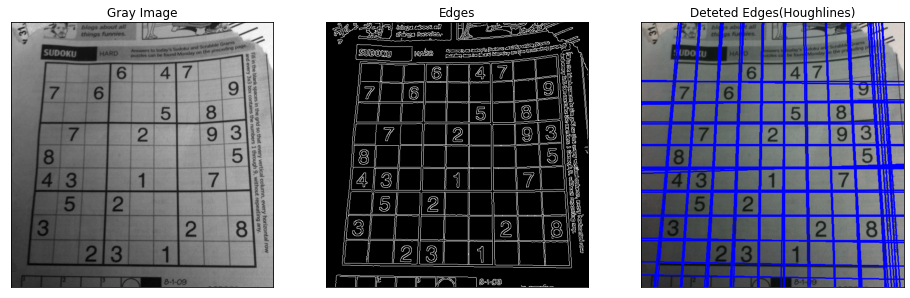

In [21]:
#Q1
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread('sudoku.png',cv.IMREAD_COLOR)
assert im is not None
gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 20, 120, apertureSize=3)
lines = cv.HoughLines(edges,1,np.pi/180,175)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0, y0 = a*rho, b*rho
    x1 ,y1 = int(x0+1000*(-b)), int(y0+1000*(a))
    x2 ,y2 = int(x0-1000*(-b)), int(y0-1000*(a))
    cv.line(im,(x1,y1),(x2,y2),(0,0,255),2)
fig, axes = plt.subplots(1,3, figsize=(16,16))
axes[0].imshow(gray,cmap='gray')
axes[0].set_title('Gray Image')
axes[1].imshow(edges,cmap='gray')
axes[1].set_title('Edges')
axes[2].imshow(im,cmap='gray')
axes[2].set_title('Deteted Edges(Houghlines)')
for i in range(3):
 axes[i].set_xticks([]), axes[i].set_yticks([])
plt.show()

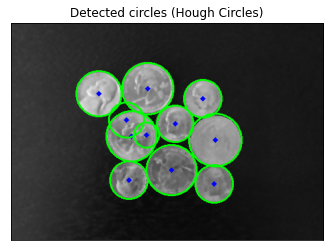

In [22]:
#Q2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('coins.jpg',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

fig , ax = plt.subplots()
ax.imshow(cimg)
ax.set_title('Detected circles (Hough Circles)')
ax.set_xticks([]), ax.set_yticks([])
plt.show()

x = 29.0, y = 109.0, scale = 1.0, orientation = 0.0, p1 = (4, 76), p2 = (54, 141)


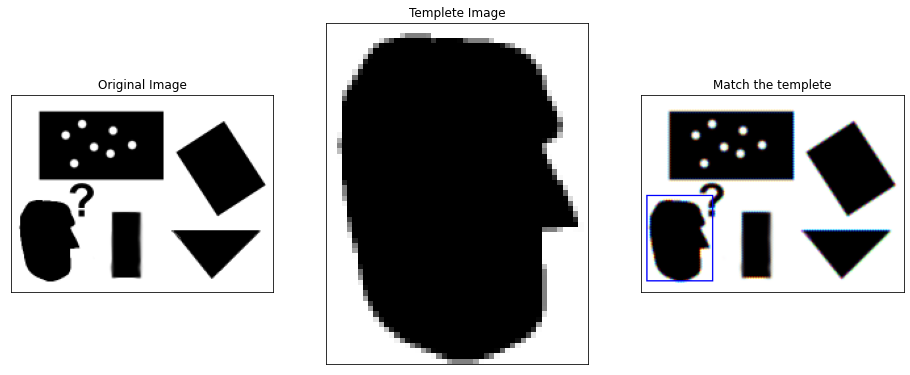

In [36]:
#Q3
img = cv.imread(r'pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None
templ = cv.imread(r'templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert templ is not None

im_edges = cv.Canny(img, 50, 250)
templ_edges = cv. Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(img, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = templ.shape[0]/2.*scale
    halfWidth = templ.shape[1]/2.*scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}, scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x,y, scale, orientation, p1, p2))
    cv.rectangle(out, p1, p2, (0,0,255))
fig, axes = plt.subplots(1,3, figsize=(16,16))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(templ,cmap='gray')
axes[1].set_title('Templete Image')
axes[2].imshow(out,cmap='gray')
axes[2].set_title('Match the templete')
for i in range(3):
 axes[i].set_xticks([]), axes[i].set_yticks([])
plt.show()

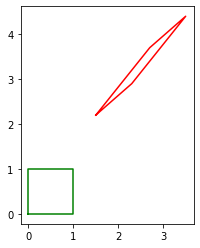

In [35]:
#Q4
a, b, c, d = [0, 0, 1], [0, 1, 1], [1,1,1], [1,0,1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx, ty = 1.5, 2.2
# H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0,0,1]])
# Y = H @ X

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5 #Should be a non-singular matrix here
A = np.array([[a11,a12,tx], [a21, a22, ty], [0,0,1]])
Y = A @ X

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')
ax.set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

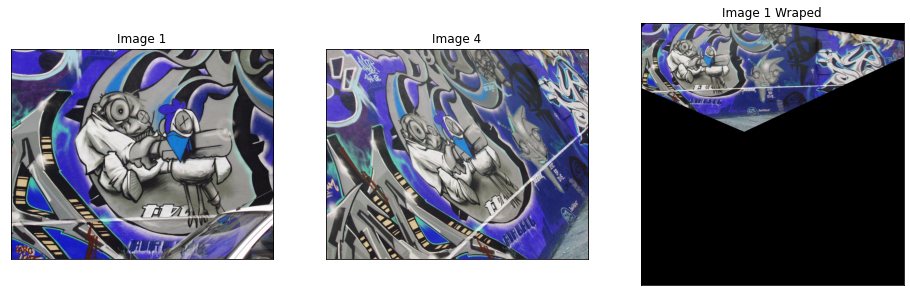

In [6]:
#Q5
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread('img1.ppm',cv.IMREAD_ANYCOLOR) 
im1 = cv.cvtColor(im1,cv.COLOR_BGR2RGB)
im4 = cv.imread('img4.ppm',cv.IMREAD_ANYCOLOR)
im4 = cv.cvtColor(im4,cv.COLOR_BGR2RGB)

H = []
with open(r'H1to4p') as f:
    H = np.array([[float(h) for h in line.split()] for line in f])
    
im1to4 = cv.warpPerspective(im4,np.linalg.inv(H),(2000,2000))    

fig, axes = plt.subplots(1,3, figsize=(16,16))
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1')
axes[1].imshow(im4,cmap='gray')
axes[1].set_title('Image 4')
axes[2].imshow(im1to4,cmap='gray')
axes[2].set_title('Image 1 Wraped')
for i in range(3):
 axes[i].set_xticks([]), axes[i].set_yticks([])
plt.show()